In [1]:
cd drive/MyDrive/

/content/drive/MyDrive


In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [3]:
model=load_model('/content/drive/MyDrive/model_inception.h5')

In [4]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/cat_classification/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3134 images belonging to 10 classes.


In [30]:
test_y=test_set.labels

In [21]:
y_pred = model.predict(test_set)

In [33]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [34]:
print(len(test_y))
print(len(y_pred))


3134
3134


In [36]:
cm=confusion_matrix(test_y, y_pred)

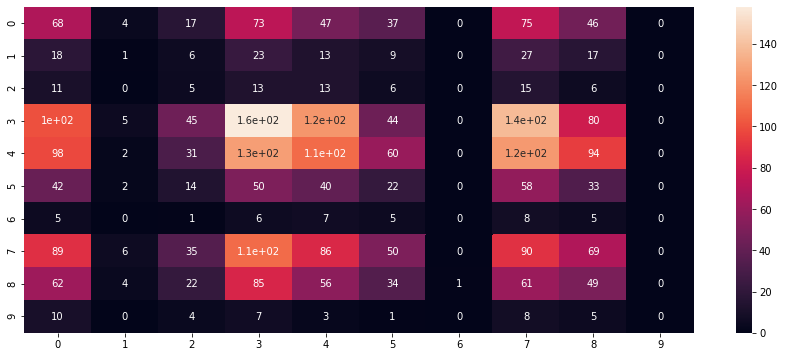

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(cm, annot=True)

In [59]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_y, y_pred)
accuracy

0.16017868538608807

In [60]:
from sklearn.metrics import f1_score
f1_score(test_y, y_pred, average='macro')

0.1003652090035779

In [61]:
from sklearn.metrics import roc_auc_score
ROC_AUC =roc_auc_score(test_y, y_pred, multi_class='ovr')

In [62]:
ROC_AUC

0.3265633213